In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [7]:
POP_SIZE = 50
GENOME_LENGTH = 16
CROSS_RATE = 0.7
MUTATION_RATE = 0.01
GENERATIONS = 100

def decode(genome):
    int_val = int(''.join(map(str, genome)), 2)
    return int_val / (2**GENOME_LENGTH - 1)

def fitness_function(x):
    return x * np.sin(10 * np.pi * x) + 1

def init_population():
    return [np.random.randint(0, 2, GENOME_LENGTH).tolist() for _ in range(POP_SIZE)]

def select(population, fitnesses):
    total_fit = sum(fitnesses)
    if total_fit == 0:
        return random.choice(population)
    probs = [f / total_fit for f in fitnesses]
    index = np.random.choice(range(len(population)), p=probs)
    return population[index][:]

def crossover(parent1, parent2):
    if random.random() < CROSS_RATE:
        point = random.randint(1, GENOME_LENGTH - 1)
        child1 = parent1[:point] + parent2[point:]
        child2 = parent2[:point] + parent1[point:]
        return child1, child2
    return parent1[:], parent2[:]

def mutate(genome):
    return [(bit if random.random() > MUTATION_RATE else 1 - bit) for bit in genome]


In [8]:
population = init_population()
best_fitnesses = []

for gen in range(GENERATIONS):
    decoded = [decode(g) for g in population]
    fitnesses = [fitness_function(x) for x in decoded]

    best_fitnesses.append(max(fitnesses))

    new_population = []

    while len(new_population) < POP_SIZE:
        parent1 = select(population, fitnesses)
        parent2 = select(population, fitnesses)
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)
        new_population.extend([child1, child2])

    population = new_population[:POP_SIZE]

decoded = [decode(g) for g in population]
fitnesses = [fitness_function(x) for x in decoded]
best_idx = np.argmax(fitnesses)
best_x = decoded[best_idx]
best_y = fitnesses[best_idx]

print(f"Лучшее решение: x = {best_x:.5f}, f(x) = {best_y:.5f}")

Лучшее решение: x = 0.85389, f(x) = 1.84751


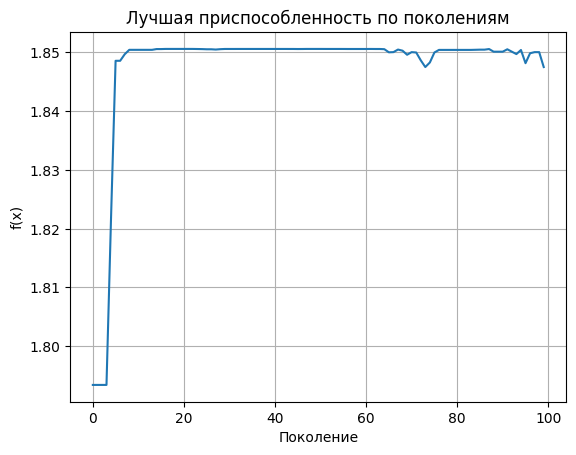

In [9]:
plt.plot(best_fitnesses)
plt.title("Лучшая приспособленность по поколениям")
plt.xlabel("Поколение")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()
